<a href="https://colab.research.google.com/github/shubhamgogri/NLP/blob/main/NLP/fake-news/Fake_News__NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Notebook contains implementation of word embedding technique initally on the sample dataset. 

Word Embedding process helps in vectorization of words to provide semantics and and generalizing the similar words in a corpus of text. 

The words are featureised on multiple dimensions to provide the similarity between all the possible words.


Any NLP word related problem statement ha to go through a series of data cleaning process which are specified in below sections.

### Word Embedding

In [ ]:
import tensorflow as tf

As a part of preprocessing of words so as to use them for embedding they are converted into the one hot encodes..

One Hot encoding is done on the data set of words. 
Where the words are given an index between a specified vocab_size    

In [ ]:
from keras.preprocessing.text import one_hot  

In [ ]:
sentences = [ 'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good']

In [ ]:
# vocabulary size
vocab_size = 1000

In [ ]:
one_hot_rep = [one_hot(word, vocab_size) for word in sentences]

In [ ]:
one_hot_rep

[[841, 943, 213, 433],
 [841, 943, 213, 410],
 [841, 976, 213, 189],
 [50, 625, 944, 162, 222],
 [50, 625, 944, 162, 648],
 [157, 841, 129, 213, 614],
 [943, 629, 229, 162]]

here the vocab size is 1000. Hence the values of index are below 1000.


Also here the 1st two sentences are similar except for the last word which is represented correctly.


Words Embedding


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.layers import Embedding
from keras.utils import pad_sequences
from keras.models import Sequential 

In [ ]:
import numpy as np

Here the sentences are padded to as to achieve a uniform size of matrix. the size can be change as per the need using maxlen parameter. 

While the pre padding is implemented to add the zeros infront of the seq. 

The given example consists of post padding example. 

In [ ]:
sent_length = 8
padded_sent = pad_sequences(one_hot_rep, padding = 'post', maxlen = sent_length)

In [ ]:
padded_sent

array([[841, 943, 213, 433,   0,   0,   0,   0],
       [841, 943, 213, 410,   0,   0,   0,   0],
       [841, 976, 213, 189,   0,   0,   0,   0],
       [ 50, 625, 944, 162, 222,   0,   0,   0],
       [ 50, 625, 944, 162, 648,   0,   0,   0],
       [157, 841, 129, 213, 614,   0,   0,   0],
       [943, 629, 229, 162,   0,   0,   0,   0]], dtype=int32)

the feature dimensions are the number of features the word are considered for vectorizing purposes. 

In [ ]:
feature_dimension = 15

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = vocab_size , output_dim = feature_dimension, input_length= sent_length  ))
model.compile(optimizer='adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 15)             15000     
                                                                 
Total params: 15,000
Trainable params: 15,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(model.predict(padded_sent[0]))

1/1 [==============================] - 0s 35ms/step
[[-0.00774602 -0.04423456  0.04890832  0.00293677 -0.02920479  0.04076333
   0.02717837 -0.01591363  0.00399208 -0.03127141 -0.04926279  0.04015915
  -0.04149141 -0.01014014  0.01268082]
 [-0.04983408 -0.02761301  0.02025219  0.01626383  0.01576941 -0.01976505
   0.00820578  0.00838715  0.01462192  0.02909298  0.02779548 -0.00296633
   0.00494424  0.03845323 -0.0450703 ]
 [ 0.03988791  0.03748988 -0.04223348 -0.02717389 -0.0354002  -0.03328349
   0.04939703  0.02107665  0.04616718 -0.0135191  -0.01834368  0.02580414
  -0.01154597 -0.0134268  -0.0178185 ]
 [ 0.00330168 -0.00040371 -0.03372315 -0.04649345  0.03920429  0.01662189
  -0.00714932 -0.02719831 -0.01580529 -0.04340274 -0.03580936 -0.01770597
   0.0389457   0.02445852  0.0302797 ]
 [-0.04139549 -0.00578694  0.013465    0.00706507 -0.01460936 -0.03691373
  -0.01449144 -0.01320434  0.04709592 -0.04622306 -0.03572468  0.0344383
  -0.04307815 -0.00973438  0.01322757]
 [-0.04139549 

Here the values in vocab are converted into the 15 dimension vector. 
 

Once that the basic implementation of the Word embedding is completed Lets look and implement it on the real dataset where the classification of news is req based on their authencity.

### Fake News Classifier

The Fake news Classifier dateset is present on the kaggle. But can access them using the link in the github. 
  

The dataset will be used to compare the two different techniques namely LSTM (RNN) and the MultiNominalNB (Naive bayes theorem).

Basically between Machine Learning Vs Deep Learning techniques 

Steps followed are:

1st the Deep Learning LSTM model is trained on the dataset
1. get the data.
2. preprocessing the words
3. One hot representation
4. word embedding in the model. 
5. model predictions and results





### Get the data

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/shubhamgogri/NLP/main/fake-news/train.csv')

In [ ]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


the dataset contains 4 independent features while 1 dependent/ target feature.

Out of the 4 independent features id is quite irrelevant.

Also for the sake just getting familiarized with the techniques only the title is considered to train the model.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


the null values are discarded

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [ ]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
data.shape


(18285, 5)

In [ ]:
y = data['label']

In [ ]:
y.shape

(18285,)

In [ ]:
X = data.iloc[:,:-1]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
dtypes: int64(1), object(3)
memory usage: 714.3+ KB


####Getting the nltk libraries 

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

from keras.utils import pad_sequences
from keras.preprocessing.text import one_hot

from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dense


In [ ]:
X.reset_index(inplace = True)

### Data Preprocessing


the necessary libraries are imported for the preprocessing and other functions.

The cell below does the following things:


* remove the characters other than the alphabets. 
* lowering the characters
* splitting the each sentence to words and performing Lemmatization technique on them using WordNetLemmatizer. Here PorterStemmer could've also been used for the stemming. 

NOte: the words are not considered if they are in stop words set.  
* joining the lemmatized words back to sentences. 
* and creating the list of sentences as the input data on the model.  



In [ ]:
lemmatizer = WordNetLemmatizer()
stp_words = set(stopwords.words('english'))
corpus = []
for i in range(len(X)):
  title = re.sub('[^a-zA-Z]', " ", X['title'][i])
  title = title.lower()
  title = title.split()  # sent to words
  title = [lemmatizer.lemquematize(word) for word in title if word not in stp_words]
  title = ' '.join(title)
  corpus.append(title)

In [ ]:
len(corpus)

18285

In [ ]:
corpus[0]

'house dem aide even see comey letter jason chaffetz tweeted'

In [ ]:
data['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

### ONe HOT REP

One hot representation provides the unique index values for all the words in the corpus considering the given vocab_size (5000).

In [ ]:
vocab_size = 5000
one_hot_rep = [one_hot(word, vocab_size) for word in corpus]
one_hot_rep

[[696, 3452, 2428, 81, 3385, 4956, 2378, 1765, 3424, 3461],
 [2431, 3370, 2065, 436, 1855, 3729, 2951],
 [1734, 2608, 3853, 2754],
 [580, 2703, 4742, 383, 4468, 3692],
 [622, 1855, 2551, 3256, 3551, 4276, 1855, 1292, 3920, 4144],
 [1549,
  1531,
  2080,
  787,
  3498,
  2955,
  4942,
  2526,
  3732,
  3889,
  448,
  3525,
  4721,
  183,
  2951],
 [4831, 992, 1835, 96, 4317, 719, 1036, 591, 1878, 2883, 1314],
 [3815, 4316, 1061, 4304, 3910, 762, 2955, 135, 1878, 2883, 1314],
 [1803, 515, 985, 614, 391, 382, 2327, 901, 2955, 1326],
 [1831, 3502, 1867, 1907, 4409, 594, 4798, 4557],
 [4656, 3747, 505, 4845, 1611, 4280, 1082, 2403, 1315, 305, 1320],
 [383, 537, 3385, 1693, 2955, 3910],
 [12, 1416, 4349, 4279, 3886, 2582, 639, 4562, 4603],
 [3008, 2121, 4216, 3440, 1302, 1670, 434, 1878, 2883, 1314],
 [3627, 4499, 3352, 3944, 1820, 1878, 2883, 1314],
 [4449, 2389, 3806, 109, 1556, 4942, 4824, 1037, 96, 4131],
 [3630, 3551, 3370],
 [508, 3012, 3108, 2948, 2955, 558, 1260, 2951],
 [1082, 1800,

### Embedding Representation

Before going in for the embedding layer in the RNN model. 

The post padding is provided to the data for uniformity of matrix accross all the input sentences 

In [ ]:
# Padding to the sequences of 20 words each
sent_length = 20
padded_sent = pad_sequences(one_hot_rep, maxlen = sent_length, padding = 'post' )
padded_sent[0:10]

array([[ 696, 3452, 2428,   81, 3385, 4956, 2378, 1765, 3424, 3461,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [2431, 3370, 2065,  436, 1855, 3729, 2951,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1734, 2608, 3853, 2754,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 580, 2703, 4742,  383, 4468, 3692,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 622, 1855, 2551, 3256, 3551, 4276, 1855, 1292, 3920, 4144,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1549, 1531, 2080,  787, 3498, 2955, 4942, 2526, 3732, 3889,  448,
        3525, 4721,  183, 2951,    0,    0,    0,    0,    0],
       [4831,  992, 1835,   96, 4317,  719, 1036,  591, 1878, 2883, 1314,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [3815, 4316, 1061, 4304, 3910,  76

In [ ]:
len(padded_sent)

18285

The model consists of multiple layers as follows: 


* Sequential model (the base layer)
* Embedding layer consisting following parameters
1. vocab_size= 5000 total words, 
2. embedding features  = no. of vectors dimension  
3. sent_length = 20 no.of words in seq 
* LSTM layer 
* Dense layer 




WHile creating the model we don't introduce the data i.e. padded sentences.

THey are passed when we fit the model  

In [ ]:
# Developing model
embedding_vector_features = 40
lstm_neurons = 256
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim= embedding_vector_features, input_length = sent_length ))
# vocab_size= 5000 total words, 
# embedding features  = no. of vectors dimension  
# sent_length = 20 no.of words in seq 
model.add(LSTM(lstm_neurons))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 256)               304128    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 504,385
Trainable params: 504,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(padded_sent) , y.shape

(18285, (18285,))

In [ ]:
import numpy as np
X_final = np.array(padded_sent)
y_final = np.array(y)

In [ ]:
X_final.shape , y_final.shape

((18285, 20), (18285,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 42)

###Model Training and results

In [ ]:
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs = 10,
          batch_size = 64)

Epoch 1/10
192/192 [==============================] - 28s 129ms/step - loss: 0.2976 - accuracy: 0.8550 - val_loss: 0.2159 - val_accuracy: 0.9117
Epoch 2/10
192/192 [==============================] - 24s 126ms/step - loss: 0.1384 - accuracy: 0.9473 - val_loss: 0.2140 - val_accuracy: 0.9107
Epoch 3/10
192/192 [==============================] - 26s 136ms/step - loss: 0.0911 - accuracy: 0.9678 - val_loss: 0.2441 - val_accuracy: 0.9167
Epoch 4/10
192/192 [==============================] - 24s 125ms/step - loss: 0.0606 - accuracy: 0.9797 - val_loss: 0.3410 - val_accuracy: 0.9064
Epoch 5/10
192/192 [==============================] - 24s 125ms/step - loss: 0.0426 - accuracy: 0.9857 - val_loss: 0.3581 - val_accuracy: 0.8993
Epoch 6/10
192/192 [==============================] - 24s 127ms/step - loss: 0.0295 - accuracy: 0.9894 - val_loss: 0.4417 - val_accuracy: 0.9112
Epoch 7/10
192/192 [==============================] - 24s 125ms/step - loss: 0.0229 - accuracy: 0.9931 - val_loss: 0.2988 - val_ac

In [ ]:
y_pred = model.predict(X_test)

189/189 [==============================] - 5s 24ms/step


In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
y_pred[0:10]

array([[0.9998592 ],
       [0.00873934],
       [0.00530735],
       [0.40669176],
       [0.9998803 ],
       [0.99989295],
       [0.999586  ],
       [0.999899  ],
       [0.99986416],
       [0.99979067]], dtype=float32)

In [ ]:
np.rint(y_pred)

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, np.rint(y_pred))

0.9067108533554267

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf = confusion_matrix(y_test, np.rint(y_pred))
cf

array([[3092,  327],
       [ 236, 2380]])

### TF- IDF with naive bayes algorithm

In [ ]:
corpus[0]

'house dem aide even see comey letter jason chaffetz tweeted'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features= 5000, ngram_range= (1,3)  )
X_tf = tfidf.fit_transform(corpus).toarray()

In [ ]:
X_tf.shape

(18285, 5000)

In [ ]:
y.shape

(18285,)

In [ ]:
type(X_tf), type(y)

(numpy.ndarray, pandas.core.series.Series)

In [ ]:
import numpy as np
X_tf_final = np.array(X_tf)
y_final = np.array(y)

In [ ]:
type(X_tf_final), type(y_final)

(numpy.ndarray, numpy.ndarray)

### MultinomialNB Model clasifier  

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =  train_test_split(X_tf_final, y_final, test_size = 0.33, random_state = 40)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
accuracy_score(y_test, y_pred)


0.8669428334714168

Hyper Parameter tuning

In [ ]:
classifier = MultinomialNB(alpha = 0.1)

In [ ]:
accuracy_scores = []
for alpha in np.arange(0,1,0.1):
  sub_classifier = MultinomialNB(alpha = alpha)
  sub_classifier.fit(X_train, y_train)
  y_pred = sub_classifier.predict(X_test)
  accuracy_scores.append(accuracy_score(y_test, y_pred))
  print(alpha , accuracy_score(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


0.0 0.851698425849213
0.1 0.8661143330571666
0.2 0.867937033968517
0.30000000000000004 0.8687655343827672
0.4 0.8695940347970174
0.5 0.8689312344656173
0.6000000000000001 0.868434134217067
0.7000000000000001 0.867771333885667
0.8 0.867937033968517
0.9 0.867937033968517


Using alpha 0.4  the accuracy is highest for MultinomialNB of 0.8695940347970174


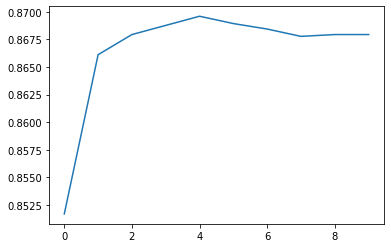

In [ ]:
import matplotlib.pyplot as plt
plt.plot(accuracy_scores)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

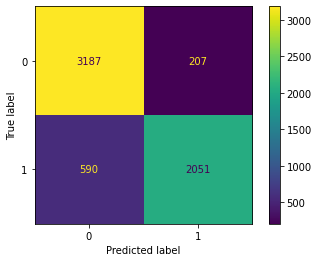

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()

In [ ]:
cm

array([[3187,  207],
       [ 590, 2051]])

In [ ]:
import seaborn as sns
heat = sns.heatmap(cm , cmap ='crest', xticklabels=["Positive","Negative"], yticklabels = ['True', 'False'] ,annot = dec(cm)) 